## Ознакомление с данными

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
from scipy import stats as st

Загрузим набор данных и взглянем на него.

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,16713,11559,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,16715,31,PS2,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_of_Release,16446.0,NaN,NaN,NaN,2006.484616,5.87705,1980.0,2003.0,2007.0,2010.0,2016.0
Genre,16713,12,Action,3369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_sales,16715.0,NaN,NaN,NaN,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,NaN,NaN,NaN,0.14506,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,NaN,NaN,NaN,0.077617,0.308853,0.0,0.0,0.0,0.04,10.22
Other_sales,16715.0,NaN,NaN,NaN,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,NaN,NaN,NaN,68.967679,13.938165,13.0,60.0,71.0,79.0,98.0
User_Score,10014,96,tbd,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Вывод**

1. В наборе данных имеется 16715 строк и 11 столбцов. В нем данные об играх, выпущенных с 1980 по 2016 год.
2. Названия столбцов написаны в верхнем регистре, нужно перевести в нижний.
3. В столбцах "имя", "год выпуска", "жанр", "оценка критиков", "оценка пользователей" и "рейтинг" имеются пропуски.
4. Данные в столбце "оценка пользователей" нужно перевести из текстового в числовой тип.
5. В столбце "оценка пользователей" наиболее часто встречается аббревиатура "tbd", которую нужно будет корректно обработать.

## Предобработка данных

### Изменение названий столбцов

Переведем названия столбцов из верхнего в нижний регистр.

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


### Обработка пропусков

Посмотрим на количество пропусков в таблице.

In [9]:
df.isna().sum() 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбцах имя и жанр всего 2 пропуска. Возможно они связаны. Проверим.

In [10]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Да, наша гипотеза подтвердилась. Помимо всего прочего, эти две строчки могут быть и дубликатом, так как и год, и платформа совпадают, разнятся лишь продажи. Похоже, что это одна и та же игра, продаваемая в Японии и в остальном мире. В любом случае данные строки удаляем из таблицы.

In [11]:
df = df.dropna(subset=['name'])

Посмотрим на пропуски в столбце "год выпуска".

In [12]:
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Некоторые игры содержат дату выхода в названии (например FIFA Soccer 2004). Заменим этими значениями пропуски в столбце "год выпуска".

In [13]:
for i in range (1980, 2017):
    df.loc[(df['year_of_release'].isna()) & (df['name'].str.contains(str(i))), 'year_of_release'] = i

Как мы видели выше, во многих строках пропущен лишь год выпуска, однако остальные ячейки заполнены, поэтому не будем удалять их, чтобы было больше данных для исследовательского анализа.

Взглянем на пропуски в столбце "оценка критиков".

In [14]:
df[df['critic_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Пропуски в последних трех столбцах могут быть связаны. Взглянем детальнее.

In [16]:
df[(df['critic_score'].isna()) & (df['user_score'].isna() & (df['rating'].isna()))].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [17]:
len(df[(df['critic_score'].isna()) & (df['user_score'].isna() & (df['rating'].isna()))])

6619

6619 строк, где пропущены и оценки критиков, и оценки пользователей, и рейтинг. Получается, что подавляющее большинство пропусков в рейтинге и оценке пользователей связаны с отсутствием оценки критиков. Если у игры нет оценки критиков, то скорее всего не будет и оценки пользователей, и рейтинга. Значит это уже не случайные пропуски, а неполная информация, и любой метод заполнения приведет к искажению

В первом пункте было отмечено, что в столбце "оценка пользователей" есть странная аббревиатура "tbd". Посмотрим на строки, где она имеется.

In [18]:
df[df['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


Ничего необычного не обнаружено. Обратившись за помощью к гуглу, несложно выяснить, что "tbd" означает "to be done", что можно перевести с английского "будет сделано". Мы же можем интерпретировать это как пропуск. 

В принципе "tbd" можно и оставить, однако лучше иметь в одном столбце данные одного типа. Учитывая, что оценки пользователей должны иметь числовой формат, будет удобно заменить "tbd" на NaN. 

In [19]:
df['user_score'] = df['user_score'].apply(lambda x: x if x != 'tbd' else np.nan)

Со столбцом "рейтинг" дело обстоит немного иначе. Взглянем на распределение значений по столбцу.

In [20]:
df['rating'].value_counts().to_frame()

,rating
E,3990
T,2961
M,1563
E10+,1420
EC,8
K-A,3
RP,3
AO,1


Зайдя на сайт ESRB, можно легко найти информацию, что "Е" означает игра для всех, "Т" - с 13 лет, "М" - с 17 лет, "Е10+" - с 10 лет. В принципе у нас есть два пути, как обработать пропуски в данном столбце. Первый - заполнить все рейтингом "Е", ведь если рейтинг не указан, значит игра доступна для всех. Второй - заполнить пропуски значением "unknown". Первый способ хоть и выглядит логичным, однако доказать это проблематично. В данном случае надежнее выбрать консервативный подход и воспользоваться вторым способом. 

In [21]:
df['rating'] = df['rating'].fillna('unknown')

Взглянем на количество пропусков, оставшихся в таблице.

In [22]:
df.isna().sum()

name                  0
platform              0
year_of_release     252
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

In [23]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown


Оставшиеся пропуски мы не можем ни заполнить, ни удалить.

**Вывод**

1. Строки, содержащие пропуски в столбцах "имя" и "жанр" были удалены.
2. Пропуски в столбце "год выпуска" были заполнены значениями из названия игры (если год упоминался в названии). Пропуски, которые не вышло обработать данным методом было решено оставить.
3. Аббревиатура "tbd" в столбце "оценка пользователей" по факту являлась пропуском и была заменена на NaN. Пропуски же в столбцах "оценка критиков" и "оценка пользователей" были оставлены, так как заполнить их не представляется возможным, а удалять нецелесообразным, т.к. в данных строках содержатся другая информация.
4. Пропуски в столбце "рейтинг" заполнены значением "неизвестно".

### Замена типа данных

Заменим тип данных в столбце "оценка пользователей" с текстового на числовой.

In [24]:
df['user_score'] = df['user_score'].astype(float)

Было бы неплохо привести "год выпуска" к целочисленному типу, однако тот факт, что мы оставили пропуски, не позволяет нам этого сделать (т.к. пропуски являются вещественным числом). В принципе с годом можно работать и в вещественном формате.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16461 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


### Суммарные продажи

Определим суммарные продажи для всех регионов.

In [26]:
df['total_sales'] = df.apply((lambda row: row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']), axis=1)

Взглянем на первые 10 строк таблицы после предобработки.

In [27]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


### Вывод

1. Названия столбцов были приведены к корректному стилю.
2. По возможности были удалены или заполнены пропущенные значения. Строки "год выпуска", "оценка критиков" и "оценка пользователей" было решено оставить с пропусками, так как их заполнение не представляется возможным, а удаление этих строк нецелесообразно.
3. Аббревиатура "tbd" в столбце "оценка пользователей" была интерпретирована как пропуск.
4. Столбец "оценка пользователей" приведен к числовому формату. 
5. Были посчитаный суммарные продажи по всем регионам.

## Исследовательский анализ данных

### Выпуск игр по годам

Посмотрим, сколько игр выпускалось в год.

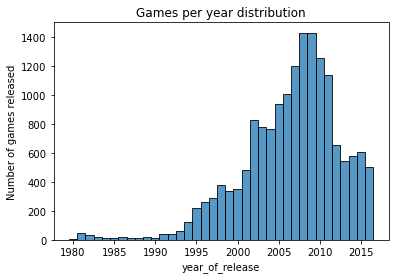

In [33]:
sns.histplot(df['year_of_release'], discrete=True)
plt.ylabel('Number of games released')
plt.xlabel('year_of_release')
plt.title('Games per year distribution')
plt.show()

По гистограмме видно, что количество игр, выпускающихся с 1980 по 1990 было крайне низким (что обусловлено уровнем технологий на тот момент). Затем это число начало стабильно расти пока не достигло пика в 2007-2008 годах. Затем число выпускаемых игр существенно снизилось и в последние 5 лет составляет 500-600 игр в год. Можно предположить, что у игровых компаний сменилась стратегия, раньше они работали на количество, но в последние годы работают на качество. Также это может быть влияние мирового кризиса 2008-го года.

Для нашего анализа наиболее важны данные за последние 5 лет, так как в них количество выпускаемых игр было примерно одинаковым.

### Продажи по платформам в разные годы

Определим суммарные продажи для каждой платформы.

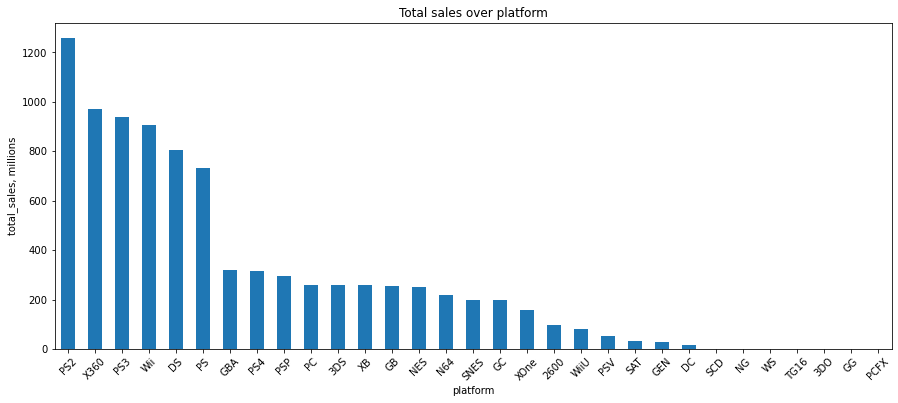

In [40]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,6))
plt.ylabel('total_sales, millions')
plt.xticks(rotation=45)
plt.title('Total sales over platform')
plt.show()

Выделим 10 лидеров по суммарным продажам: PS2, Xbox 360, PS3, Wii, DS, PS, GBA, PS4, PSP, PC. Посмотрим как менялись их суммарные продажи по годам.

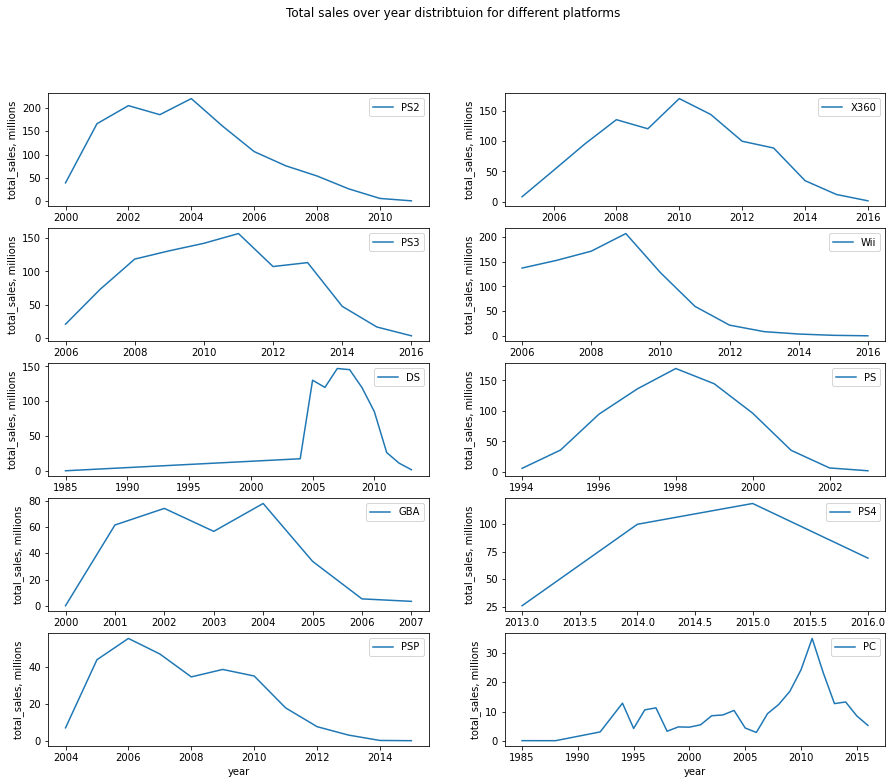

In [41]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

fig, axes = plt.subplots(5, 2, figsize=(15,12))

for i in range(5):
    for j in range (2):
        (df[df['platform'] == platforms[i*2 + j]]
        .groupby('year_of_release', as_index=False)['total_sales']
        .sum()
        .plot(x='year_of_release', y='total_sales', label=platforms[i*2 + j], ax=axes[i, j]))
        axes[i, j].set_xlabel('year')
        axes[i, j].set_ylabel('total_sales, millions')
fig.suptitle('Total sales over year distribtuion for different platforms')
plt.show()

По графикам видно, что после появления какой-либо платформы продажи на ней стабильно растут, достигают пика и начинают снижаться до нуля. Это связано с тем, что платформы банально устаревают. В это правило однако не вписывается PC, так как компьютеры постоянно обновляются и улучшаются. Сложно предсказать динамику компьютерного гейминга в следующие годы, однако с 2010 года количество проданных копий снижается.

Судя по выбранным платформам, характерное время существования для платформы около 10 лет. За это время она успевает стать очень популярной, а затем исчезнуть с рынка. Разве что DS и PC (по причине озвученной выше) выбиваются из общего ряда. 

Построим все графики на одном для сравнения.

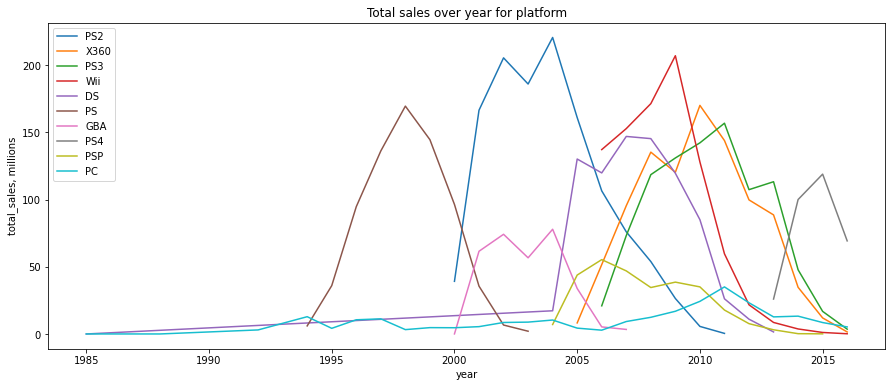

In [42]:
df_plat = df.pivot_table(index=['platform', 'year_of_release'], values = 'total_sales', aggfunc='sum')
df_plat = df_plat.query('platform in @platforms')
df_plat = df_plat.reset_index()
plt.figure(figsize=(15,6))
for platform in platforms:
    df_plat_plot = df_plat[df_plat['platform'] == platform]
    plt.plot(df_plat_plot['year_of_release'], df_plat_plot['total_sales'], label = platform)
plt.xlabel('year')
plt.ylabel('total_sales, millions')
plt.legend()
plt.title('Total sales over year for platform')
plt.show()

Можно отметить, что Playstation стабильно выпускает новую консоль, когда предыдущая начинает устаревать. Также заметно, что в последние 15 лет у Playstation появились серьезные конкуренты. Интересно и то, что у самой первой Playstation на пике популярности продано примерно столько же копий, сколько у PS3 и Xbox 360.

Продажи игр на PC значительно ниже продаж на наиболее популярных консолях.

В последние годы продается всё меньше игр, что коррелирует с тем, что мы получили в пункте 3.1. Разве что продажи PS4 росли с 2013 по 2015 (из-за того, что она только вышла и была популярна), однако уже в 2016 и ее продажи упали.

### Выбор актуального периода

В данном пункте нужно выбрать "актуальный период", который поможет построить прогноз продаж на 2017 год.

Основываясь на уже полученных результатах, наиболее логичным будет выбрать данные за последние 5 лет. После пика в 2007-2008 годах стало выходить значительно меньше игр, в последние 5 лет их число стабильно составляет 500-600. Также важный факт в том, что в среднем "срок жизни" платформы составляет 10 лет, за 5 лет та или иная условная платформа "не успеет" появиться или полностью устареть. 

In [43]:
df = df.query('year_of_release > 2011')

Посмотрим, сколько данных осталось в таблице.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2887 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2887 non-null   object 
 1   platform         2887 non-null   object 
 2   year_of_release  2887 non-null   float64
 3   genre            2887 non-null   object 
 4   na_sales         2887 non-null   float64
 5   eu_sales         2887 non-null   float64
 6   jp_sales         2887 non-null   float64
 7   other_sales      2887 non-null   float64
 8   critic_score     1313 non-null   float64
 9   user_score       1532 non-null   float64
 10  rating           2887 non-null   object 
 11  total_sales      2887 non-null   float64
dtypes: float64(8), object(4)
memory usage: 293.2+ KB


### Потенциально прибыльные платформы

Для начала взглянем, какие платформы были представлены в последние 5 лет.

In [45]:
df['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

Всего 11 платформ. Выберем из них 5 с наиболее крупными продажами и посмотрим, как изменялись продажи по годам.

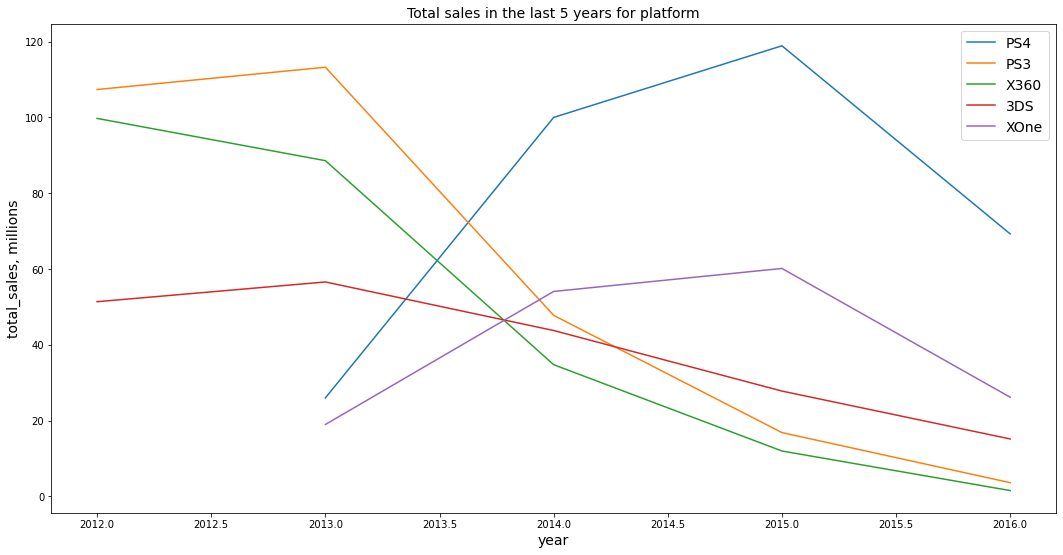

In [47]:
df_platform = df.pivot_table(index=['platform', 'year_of_release'], values = 'total_sales', aggfunc='sum')
df_platform = df_platform.reset_index()

platforms_top5 = (df_platform
                  .groupby(by='platform', as_index=False)['total_sales']
                  .sum()
                  .sort_values(by='total_sales', ascending=False)['platform'][:5])

plt.figure(figsize=(18,9))
for platform in platforms_top5:
    df_plat_plot = df_platform[df_platform['platform'] == platform]
    sns.lineplot(data=df_plat_plot, x='year_of_release', y='total_sales', label = platform)
plt.xlabel('year', fontsize=14)
plt.ylabel('total_sales, millions', fontsize=14)
plt.legend(fontsize=14)
plt.title('Total sales in the last 5 years for platform', fontsize=14)
plt.show()

В последние годы набирают популярность PS4 и Xbox one, которые пришли на смену своим предшественникам PS3 и Xbox 360. Еще одной неплохо продаваемой в последние годы платформой является Nintendo 3DS, однако и она устаревает как PS3 и Xbox 360. Несмотря на неудачный 2016й год, PS4 и Xbox one являются новыми и хорошо продаваемыми платформами. Выбираем их как потенциально прибыльные.

### "Ящик с усами" для глобальных продаж по платформам

Построим диаграммы рассеяния для глобальных продаж в разбивку по платформам.

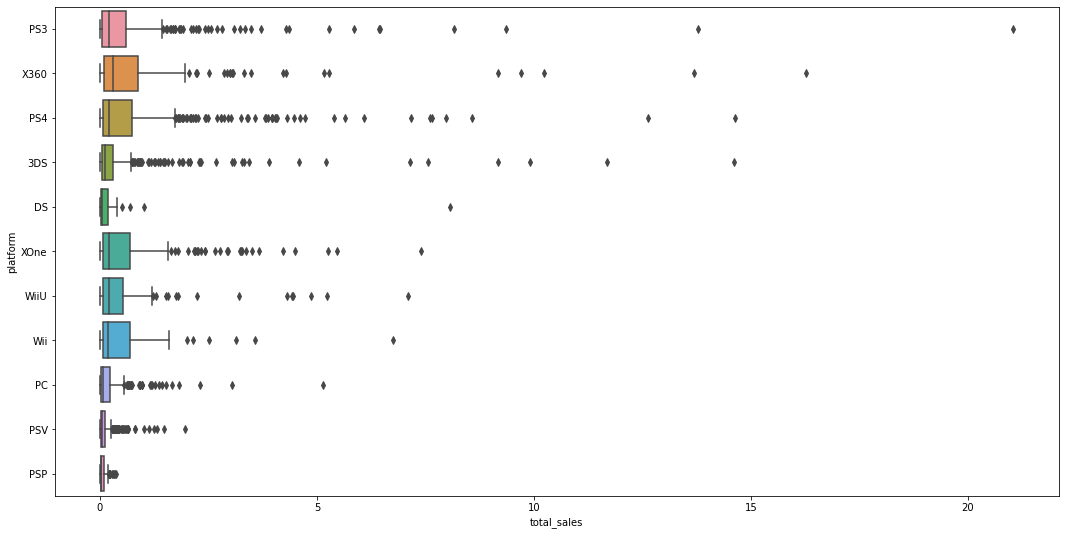

In [48]:
plt.figure(figsize=(18,9))
sns.boxplot(data=df, x='total_sales', y='platform')
plt.show()

Для большей ясности ограничим ось абсцисс.

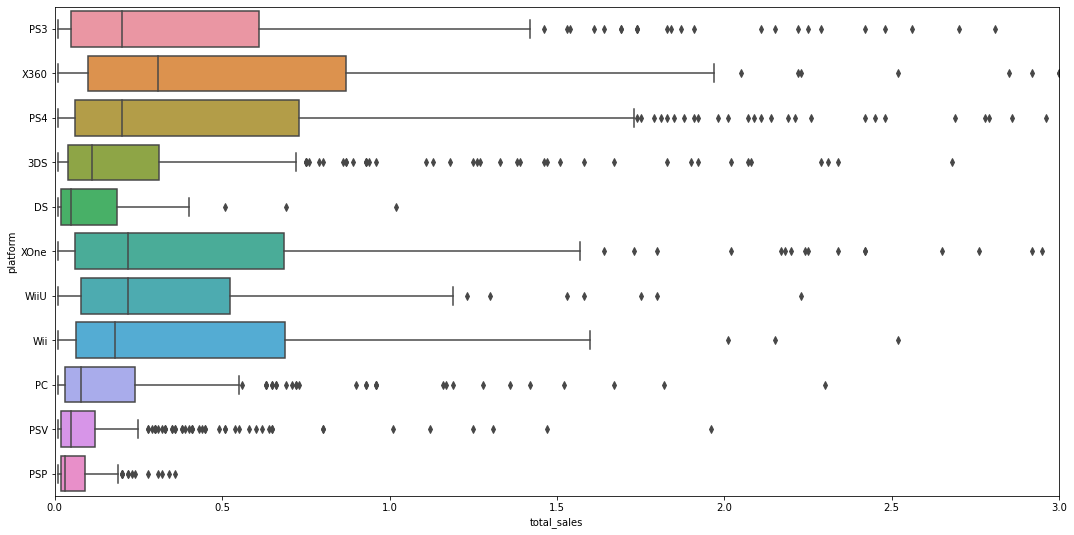

In [49]:
plt.figure(figsize=(18,9))
sns.boxplot(data=df, x='total_sales', y='platform')
plt.xlim(0, 3)
plt.show()

Для всех платформ медианное значение продаж игры не превышает 500 тысяч копий. Однако на всех платформах есть игры с очень высоким количеством проданных копий, которые являются выбросами на диаграмме рассеяния. Данные выбросы говорят о наличии необычайно успешных проектов, которые продаются милионными тиражами. Наиболее продаваемая игра была продана для PS3 в тираже более 20 миллионов копий. Анализируя медианные значения, можно заключить, что "типичная" игра на Xbox 360 продается лучше остальных платформ. Следом идут PS3, PS4, Xbox one, WiiU.

### Влияние отзывов на продажи

Посмотрим, как влияют отзывы критиков и пользователей на продажи внутри одной платформы. Рассмотрим 5 наиболее популярных платформ, которые мы определили в пункте 3.4

In [50]:
platforms_top5 = platforms_top5.reset_index(drop=True)
platforms_top5

0     PS4
1     PS3
2    X360
3     3DS
4    XOne
Name: platform, dtype: object

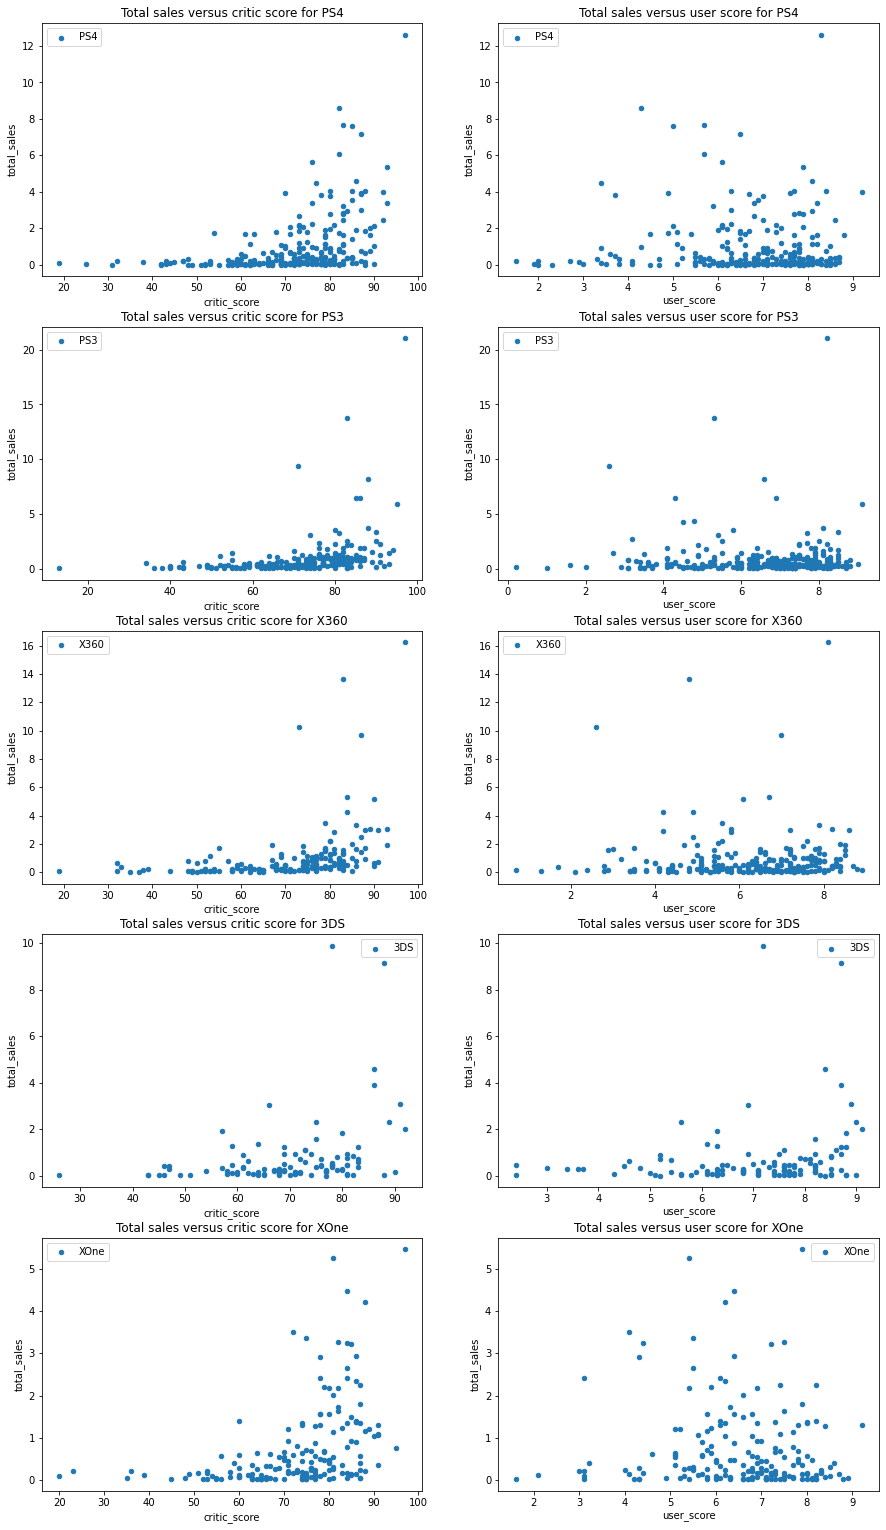

In [51]:
fig, axes = plt.subplots(5, 2, figsize=(15, 27))

for i in range(5):
    (df[df['platform'] == platforms_top5[i]]
     .plot(kind='scatter', x='critic_score', y='total_sales', label=platforms_top5[i], ax=axes[i, 0]))
    (df[df['platform'] == platforms_top5[i]]
     .plot(kind='scatter', x='user_score', y='total_sales', label=platforms_top5[i], ax=axes[i, 1]))
    axes[i, 0].set_title(f'Total sales versus critic score for {platforms_top5[i]}')
    axes[i, 1].set_title(f'Total sales versus user score for {platforms_top5[i]}')
plt.show()

Теперь посчитаем корреляцию между отзывами и продажами для выбранных платформ.

In [52]:
for platform in platforms_top5:
    print(f'Матрица корреляции для {platform}')
    display(df.query('platform == @platform')[['critic_score', 'user_score', 'total_sales']].corr())
    print('')

Матрица корреляции для PS4


,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000



Матрица корреляции для PS3


,critic_score,user_score,total_sales
critic_score,1.000000,0.539456,0.331497
user_score,0.539456,1.000000,-0.005144
total_sales,0.331497,-0.005144,1.000000



Матрица корреляции для X360


,critic_score,user_score,total_sales
critic_score,1.000000,0.557352,0.360573
user_score,0.557352,1.000000,0.006164
total_sales,0.360573,0.006164,1.000000



Матрица корреляции для 3DS


,critic_score,user_score,total_sales
critic_score,1.000000,0.722762,0.320803
user_score,0.722762,1.000000,0.197583
total_sales,0.320803,0.197583,1.000000



Матрица корреляции для XOne


,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


Для всех рассмотренных платформ оценка критиков имеют слабую корреляцию с продажами (около 0.3-0.4). Корреляция же оценок пользователей с продажами может быть оценена как очень слабая. Стоит отметить, что для всех платформ она колеблется около нуля, однако для DS3 она лежит в районе 0.2. В целом можно сделать вывод, что оценки игроков никак не влияют на продажи, а оценки критиков имеют слабое влияние.

### Распределение игр по жанрам

Посмотрим на распределение игр по жанрам, а также выделим жанры с самыми низкими и высокими продажами. Для этого создадим сводную таблицу, содержащую данные о количестве игр в каждом жанре и о суммарных продадах по жанру, а также рассчитаем среднее количество продаж на одну игру в каждом жанре. Таблицу отсортируем по количеству игр.

In [59]:
df_genre = df.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum', 'mean']).reset_index()
df_genre.columns = ['genre', 'games_released', 'total_sales', 'sales_per_game']
df_genre = df_genre.sort_values(by='games_released', ascending=False).reset_index(drop=True)

In [60]:
df_genre

,genre,games_released,total_sales,sales_per_game
0,Action,1032,441.47,0.427781
1,Role-Playing,370,192.80,0.521081
2,Adventure,302,29.43,0.097450
3,Sports,268,181.07,0.675634
4,Shooter,235,304.73,1.296723
5,Misc,192,85.04,0.442917
6,Racing,115,53.50,0.465217
7,Fighting,109,44.49,0.408165
8,Platform,85,61.00,0.717647
9,Simulation,80,35.12,0.439000


Для наглядности представим данную сводную таблицу в виде графиков.

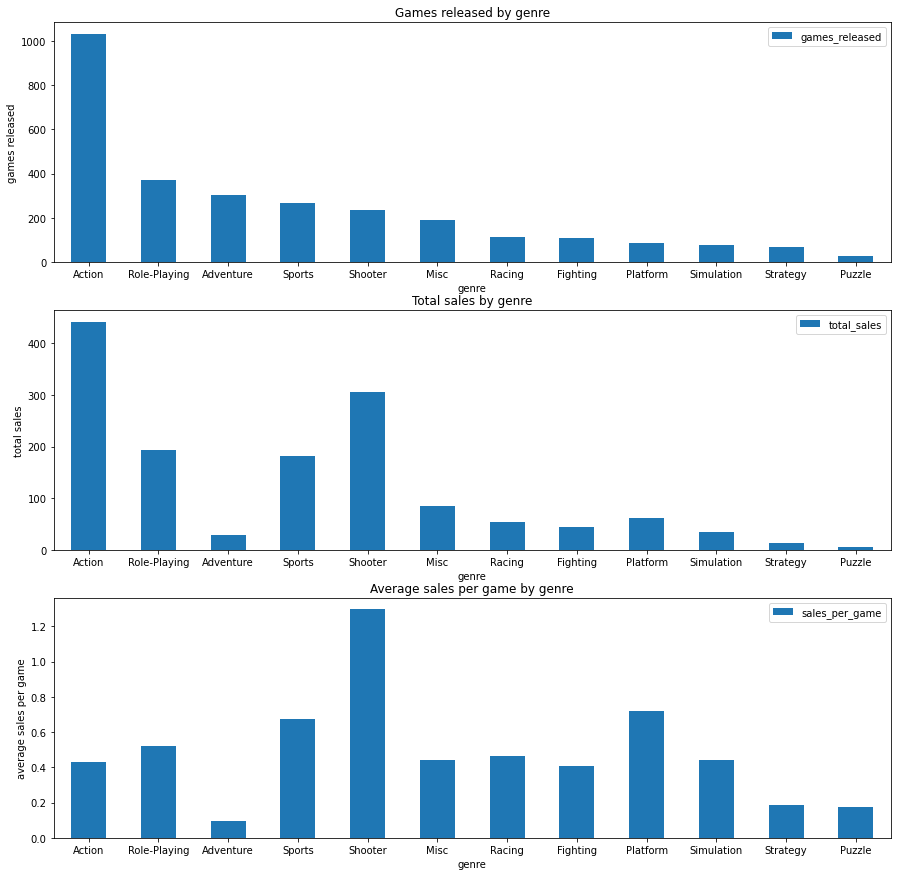

In [61]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

df_genre.plot(kind='bar', x='genre', y='games_released', ax=axes[0], title='Games released by genre')
axes[0].set_ylabel('games released')
df_genre.plot(kind='bar', x='genre', y='total_sales', ax=axes[1], title='Total sales by genre')
axes[1].set_ylabel('total sales')
df_genre.plot(kind='bar', x='genre', y='sales_per_game', ax=axes[2], title='Average sales per game by genre')
axes[2].set_ylabel('average sales per game')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=0)

Абсолютным лидером по числу выпущенных игр является жанр Action, аутсайдером же является жанр Puzzle. Та же картина и для глобальных продаж. Однако, чтобы корректно оценить прибыльность жанров, был рассчитан и рассмотрен показатель - среднее количество продаж на одну игру. И по этому показателю абсолютным лидером является жанр Shooter. В среднем игра данного жанра продается тиражом более 1.2 млн копий, для жанра Action это значение слегка превышает 0.4 млн копий. Аутсайдером же по данному показателю является жанр Adventure со средним показателем чуть меньше 100 тысяч проданных копий на игру.

###  Вывод

1. Количество выпускаемых игр росло с 1980 года, достигло пика в 2007-2008, а затем упало в более чем 2 раза. В последние 5 лет выпускается около 500-600 игр в год.
2. Характерный срок появления новых и исчезновения старых платформ - 10 лет.
3. Для того, чтобы построить прогноз на 2017 год, был выбран актуальный период, который составил 5 лет. Дальнейшие выводы были получены по данным 2012-2016 годов.
4. Потенциально прибыльными платформами являются PS4 и Xbox one. 
5. Для всех платформ медианное значение продаж игры не превышает 500 тысяч копий. Однако на всех платформах есть крайне успешные проекты, которые продаются милионными тиражами. Наиболее продаваемая игра была продана для PS3 в тираже более 20 миллионов копий. Анализируя медианные значения, можно заключить, что "типичная" игра на Xbox 360 продается лучше остальных платформ. Следом идут PS3, PS4, Xbox one, WiiU.
6. Оценки критиков имеют слабое влияние на продажи, оценки же пользователей вообще никак не влияют на продажи.
7. Наибольшее количество игр было выпущено в жанре Action, в этом же жанре наивысшее суммарное количество продаж. Однако, наиболее прибыльным жанром является Shooter, т.к. в среднем игра данного жанра продается тиражом более 1.2 млн копий, этот же покатазатель для жанра Action лишь слегка превышает 0.4 млн копий. Наименее прибыльным является жанр Adventure со средним тиражом продаж на одну игру менее 100 тысяч копий.

## Портрет пользователя каждого региона

### Самые популярные платформы

Определим суммарные продажи по платформе в каждом регионе. Для сравнения платформ по регионам создадим дополнительные столбцы, характерирузющие долю продаж одной конкретной платформы от всех продаж в регионе.

In [62]:
df_platform_na = df.groupby('platform', as_index=False)['na_sales'].sum()
df_platform_na['na_sales_share'] = df_platform_na['na_sales'] / df_platform_na['na_sales'].sum()
df_platform_eu = df.groupby('platform', as_index=False)['eu_sales'].sum()
df_platform_eu['eu_sales_share'] = df_platform_eu['eu_sales'] / df_platform_eu['eu_sales'].sum()
df_platform_jp = df.groupby('platform', as_index=False)['jp_sales'].sum()
df_platform_jp['jp_sales_share'] = df_platform_jp['jp_sales'] / df_platform_jp['jp_sales'].sum()

df_platform_regions = reduce(lambda left, right: pd.merge(left, right, on='platform'), [df_platform_na, df_platform_eu, df_platform_jp])

In [64]:
df_platform_regions

,platform,na_sales,na_sales_share,eu_sales,eu_sales_share,jp_sales,jp_sales_share
0,3DS,55.31,0.093582,42.64,0.084091,87.79,0.455862
1,DS,4.59,0.007766,3.53,0.006962,3.72,0.019317
2,PC,19.18,0.032452,38.01,0.074960,0.00,0.000000
3,PS3,103.38,0.174915,106.86,0.210740,35.29,0.183249
4,PS4,108.74,0.183984,141.09,0.278246,15.96,0.082875
5,PSP,0.13,0.000220,0.42,0.000828,10.47,0.054367
6,PSV,10.98,0.018578,11.36,0.022403,21.04,0.109253
7,Wii,17.45,0.029525,11.92,0.023508,3.39,0.017603
8,WiiU,38.10,0.064464,25.13,0.049559,13.01,0.067556
9,X360,140.05,0.236959,74.52,0.146962,1.57,0.008152


Провизаулизируем полученную сводную таблицу.

In [66]:
def barplot_region(region_sales, region, a, b):
    '''
    Данная функция строит столбчатые диаграммы продаж по плафтормам в разных регионах.
    '''
    sns.barplot(data=df_platform_regions, 
            x='platform', 
            y=region_sales, 
            order=df_platform_regions.sort_values(by=region_sales, ascending=False)['platform'], 
            ax=axes[a ,b])
    axes[a, b].set_title(f'Sales over platform in {region}')

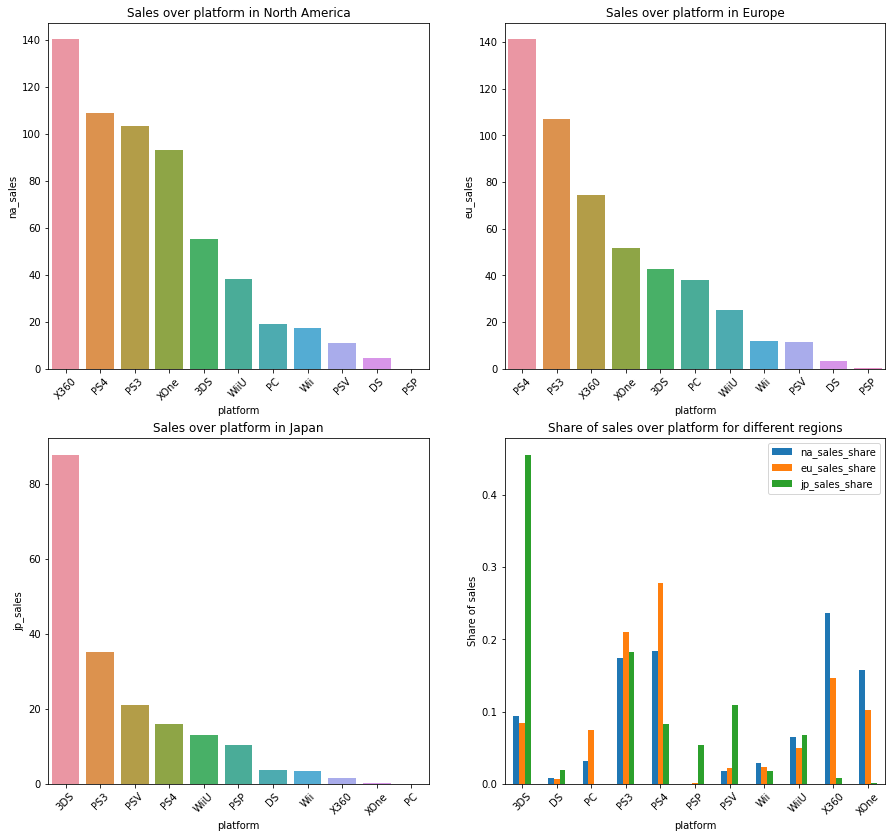

In [67]:
fig, axes = plt.subplots(2, 2, figsize=(15,14))

barplot_region('na_sales', 'North America', 0, 0)
barplot_region('eu_sales', 'Europe', 0, 1)
barplot_region('jp_sales', 'Japan', 1, 0)

df_platform_regions[['platform', 'na_sales_share', 'eu_sales_share', 'jp_sales_share']].plot(kind='bar',
         x='platform',
         ax=axes[1 ,1])
axes[1, 1].set_title('Share of sales over platform for different regions')
axes[1, 1].set_ylabel('Share of sales')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

5 наиболее популярных платформ не отличаются в Европе и Северной Америке: Xbox 360, PS4, PS3, Xbox one, 3DS. Однако в Европе лидирует Playstation, а в Америке Xbox 360. В Японии же ситуация сильно разнится, здесь явным лидером является 3DS, также в пятерку вошли PS3, PSV, PS4 и WiiU.  

Глядя на сравнение долей продаж каждой платформы в регионах, можно сделать вывод, что пользователи в Америке и Европе похожи друг на друга, а вот пользователи из Японии кардинально отличаются. Платформа 3DS составляет почти 46% от общих продаж в Японии, однако в других регионах не доходит и до 10%. Популярные в Америке и Европе консоли Xbox не пользуются популярностью в Японии. Можно предположить, что японцы предпочитают отечественного производителя (Xbox принадлежит американской компании Microsoft, наиболее же популярные платформы в Японии исключительно японские). Заметным отличием между Европой и Америкой можно назвать то, что в Европе популярнее Playstation, а в Америке Xbox. Стоит также отметить, что в Европе и Америке почти не играют на PSP, а в Японии на PC.

### Самые популярные жанры

Определим самые популярные жанры в каждом регионе. Для этого выполним ту же процедуру, что мы делали для платформ, но группировать даннные будем по жанрам. Как и в предыдущем случае для каждого жанра определим долю его продаж от всех продаж в регионе.

In [68]:
df_genre_na = df.groupby('genre', as_index=False)['na_sales'].sum()
df_genre_na['na_sales_share'] = df_genre_na['na_sales'] / df_genre_na['na_sales'].sum()
df_genre_eu = df.groupby('genre', as_index=False)['eu_sales'].sum()
df_genre_eu['eu_sales_share'] = df_genre_eu['eu_sales'] / df_genre_eu['eu_sales'].sum()
df_genre_jp = df.groupby('genre', as_index=False)['jp_sales'].sum()
df_genre_jp['jp_sales_share'] = df_genre_jp['jp_sales'] / df_genre_jp['jp_sales'].sum()


df_genre_regions = reduce(lambda left, right: pd.merge(left, right, on='genre'), [df_genre_na, df_genre_eu, df_genre_jp])

In [69]:
df_genre_regions

,genre,na_sales,na_sales_share,eu_sales,eu_sales_share,jp_sales,jp_sales_share
0,Action,177.90,0.301000,159.59,0.314730,52.80,0.274172
1,Adventure,8.92,0.015092,9.46,0.018656,8.24,0.042787
2,Fighting,19.79,0.033484,10.79,0.021279,9.44,0.049019
3,Misc,38.19,0.064616,26.32,0.051906,12.86,0.066777
4,Platform,25.38,0.042942,21.41,0.042223,8.63,0.044813
5,Puzzle,1.13,0.001912,1.40,0.002761,2.14,0.011112
6,Racing,17.22,0.029136,27.29,0.053819,2.50,0.012982
7,Role-Playing,64.00,0.108286,48.53,0.095707,65.44,0.339807
8,Shooter,144.77,0.244945,113.47,0.223776,9.23,0.047928
9,Simulation,7.97,0.013485,14.55,0.028694,10.41,0.054055


In [70]:
def barplot_genre(region_sales, region, a, b):
    '''
    Данная функция строит столбчатые диаграммы продаж по жанрам в разных регионах.
    '''
    sns.barplot(data=df_genre_regions, 
            x='genre', 
            y=region_sales, 
            order=df_genre_regions.sort_values(by=region_sales, ascending=False)['genre'], 
            ax=axes[a ,b])
    axes[a, b].set_title(f'Sales over genre in {region}')

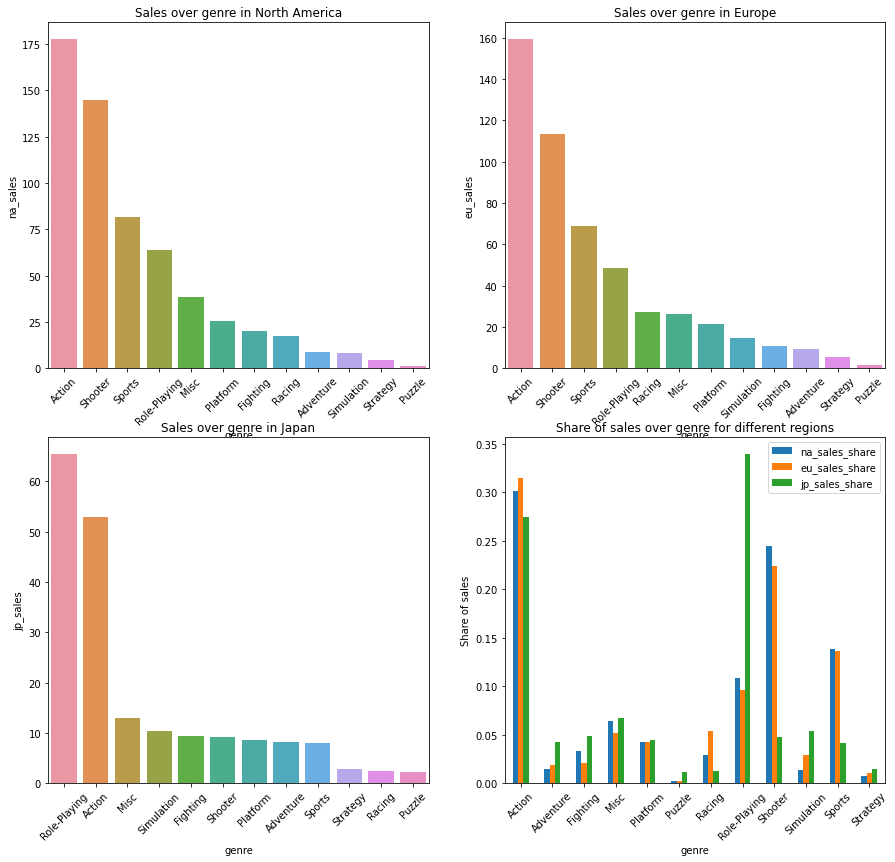

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(15,14))

barplot_genre('na_sales', 'North America', 0, 0)
barplot_genre('eu_sales', 'Europe', 0, 1)
barplot_genre('jp_sales', 'Japan', 1, 0)

df_genre_regions[['genre', 'na_sales_share', 'eu_sales_share', 'jp_sales_share']].plot(kind='bar',
         x='genre',
         ax=axes[1 ,1])
axes[1, 1].set_title('Share of sales over genre for different regions')
axes[1, 1].set_ylabel('Share of sales')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

В Северной Америке и Европе 4 наиболее популярных жанра одинаковые: Action, Shooter, Sports, Role-Playing. Замыкает пятерку лидеров жанр Misc в Северной Америке и жанр Racing в Европе (хотя в Европе жанр Misc идет следом с небольшим отставанием. В Японии ситуация иная. В пятерку вошли Role-Playing, Action, Misc, Simulation и Fighting. Стоит отметить, что в Японии ролевые игры и экшн сильно впереди остальных жанров.

Сравнивая долю каждого жанра в регионах, можно сделать вывод, что пользователи в Европе и Америке похожи друг на друга, а вот в Японии ситуация иная. Ролевые игры составляют примерно треть от всех проданных игр в Японии, в других регионах это число ниже - около 10%. Обратная ситуация с жанром Shooter - в Европе и Америке он составляет 23-25% от общих продаж, а в Японии всего 5%. Стоит отметить, что японцы не очень любят жанр спорт, который довольно популярен в Америке и Европе. Стоит отметить, что жанр Action примерно одинаково популярен во всех регионах.

### Влияние рейтинга ESRB на продажи

Посмотрим, сколько данных по каждому рейтингу осталось в таблице после отсечения актуального периода.

In [78]:
df['rating'].value_counts()

unknown    1275
M           499
T           412
E           395
E10+        306
Name: rating, dtype: int64

Напомним, что M - игра с 17 лет, T - с 13 лет, E10+ - с 10 лет, Е - без ограничений. 

Чтобы оценить влияние рейтинга на уровень продаж, построим распределение продаж и диаграммы рассеяния для каждого региона по жанрам.

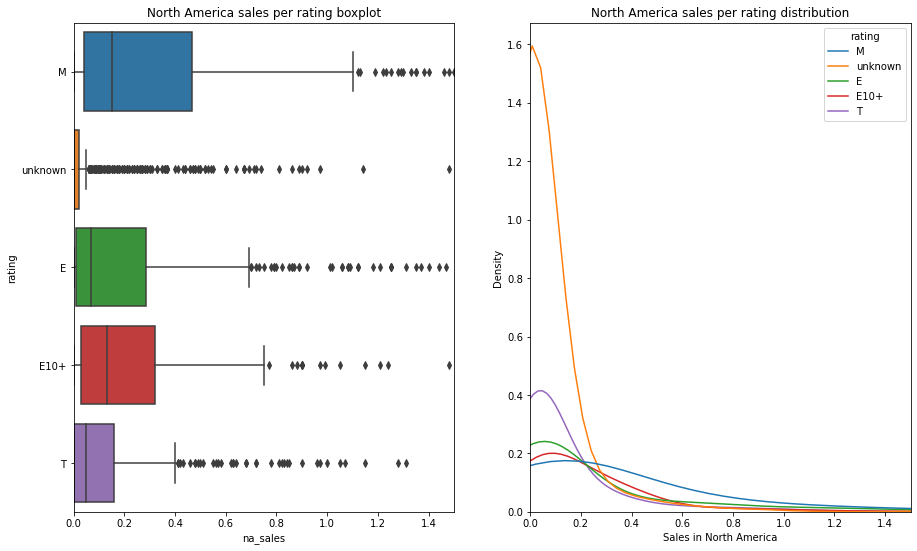

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(15,9))

sns.boxplot(data=df, x='na_sales', y='rating', ax=axes[0])
axes[0].set_xlim(0,1.5)
axes[0].set_title('North America sales per rating boxplot')

sns.kdeplot(data=df, x='na_sales', hue='rating', ax=axes[1])
axes[1].set_xlim(0,1.5)
axes[1].set_xlabel('Sales in North America')
axes[1].set_title('North America sales per rating distribution')
plt.show()

Распределение продаж в Северной Америке для всех рейтингов имеет похожий вид. Мощный пик на уровне низких продаж (менее 0.2 млн копий), а также тяжелый хвост. Все распределения скошены вправо. Рассматривая диаграмму размаха, можно сказать, что игры для взрослых (17+) продаются лучше всего, а вот игры для подростков (13+) хуже всего. Игры, в которых неизвестен рейтинг, продаются крайне плохо.

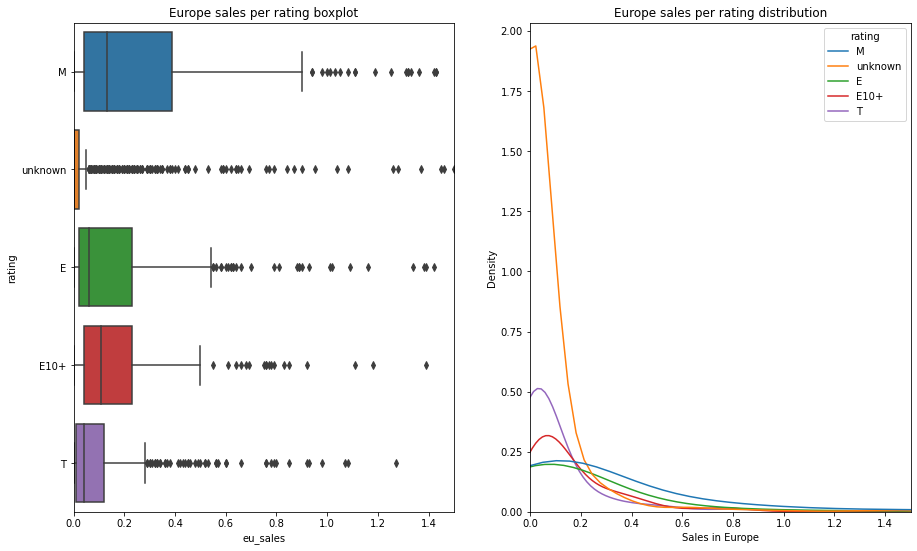

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(15,9))

sns.boxplot(data=df, x='eu_sales', y='rating', ax=axes[0])
axes[0].set_xlim(0,1.5)
axes[0].set_title('Europe sales per rating boxplot')

sns.kdeplot(data=df, x='eu_sales', hue='rating', ax=axes[1])
axes[1].set_xlim(0,1.5)
axes[1].set_xlabel('Sales in Europe')
axes[1].set_title('Europe sales per rating distribution')
plt.show()

Ситуация в Европе такая же.

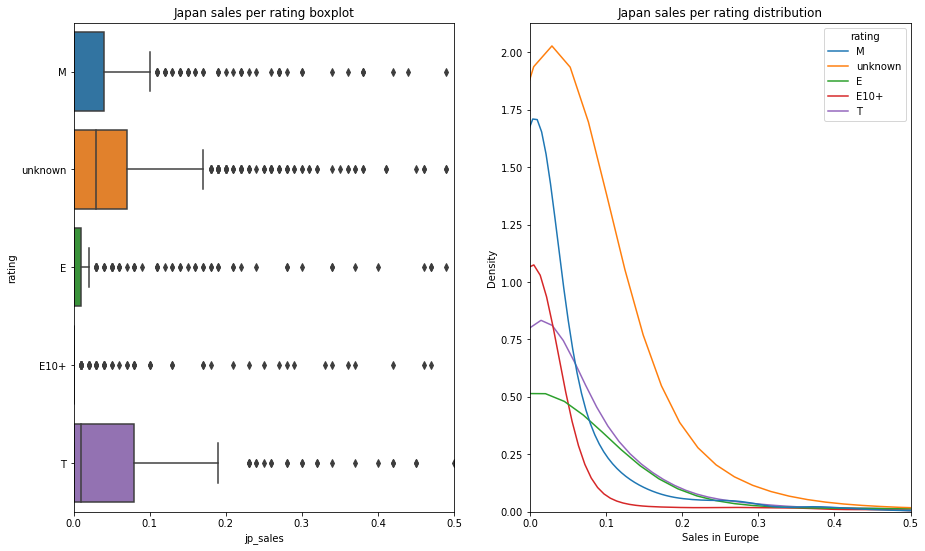

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(15,9))

sns.boxplot(data=df, x='jp_sales', y='rating', ax=axes[0])
axes[0].set_xlim(0,0.5)
axes[0].set_title('Japan sales per rating boxplot')

sns.kdeplot(data=df, x='jp_sales', hue='rating', ax=axes[1])
axes[1].set_xlim(0,0.5)
axes[1].set_xlabel('Sales in Europe')
axes[1].set_title('Japan sales per rating distribution')
plt.show()

В Японии ситуация кардинально меняется. Игры с неизвестным рейтингом и игры для подростков хорошо продаются, аутсайдерами являются игры для всех или игры 10+.

Попробуем сравнить влияние рейтинга в разных регионах. Для этого определим суммарные продажи для каждого рейтинга в каждом регионе, а затем разделим их на суммарные продажи в регионе, чтобы получить долю продаж определенного рейтинга в регионе.

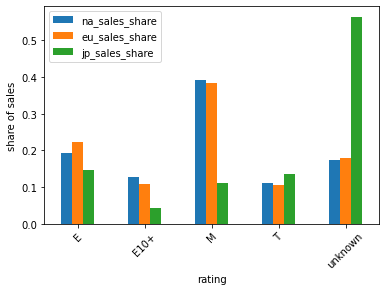

In [91]:
df_rating = df.groupby('rating', as_index=False)[['eu_sales', 'na_sales', 'jp_sales']].sum()

df_rating['na_sales_share'] = df_rating['na_sales'] / df_rating['na_sales'].sum()
df_rating['eu_sales_share'] = df_rating['eu_sales'] / df_rating['eu_sales'].sum()
df_rating['jp_sales_share'] = df_rating['jp_sales'] / df_rating['jp_sales'].sum()

df_rating[['rating', 'na_sales_share', 'eu_sales_share', 'jp_sales_share']].plot(kind='bar', x='rating')
plt.xticks(rotation=45)
plt.ylabel('share of sales')
plt.show()

Как было указано раньше, Северная Америка и Европа похожи между собой по поведению, в них очень хорошо продаются игры для взрослых, в Японии же лидерство за играми с неизвестным жанром.

### Вывод.

1. Пользователи в Северной Америке и Европе похожи друг на друга, но пользователи в Японии сильно отличаются.
2. В Европе и Северной Америке самые популярные платформы - Xbox и Playstation, причем в Европе немного популярнее Playstation, а в Америке Xbox. В Японии лидером является платформа 3DS, но и на Playstation люди играют, чего не сказать про Xbox, обе консоли которого являются аутсайдерами в Японии на равне с PC.
3. В Северной Америке и Европе чаще всего играют в жанры Action или Shooter, в Японии - Role-playing и Shooter. 
4. Рейтинг игры оказывает разное влияние на продаваемость игр в разных регионах. В Северной Америке и Европе лучше всего продаются игры для взрослых (17+), в Японии же игры с неизвестным рейтингом.

## Проверка статистических гипотез

### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox one и PC одинаковы

Для начала посмотрим на распределения пользовательских оценок по платформам, а также на среднее, медиану и стандартное отклонение.

In [92]:
df_us_score_xbox_one = df.query('platform == "XOne"')['user_score'].dropna()
df_us_score_pc = df.query('platform == "PC"')['user_score'].dropna()

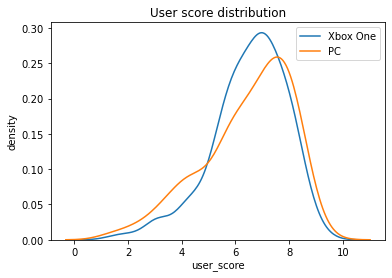

In [93]:
sns.kdeplot(df_us_score_xbox_one, label = 'Xbox One')
sns.kdeplot(df_us_score_pc, label = 'PC')
plt.ylabel('density')
plt.title('User score distribution')
plt.legend()
plt.show()

In [94]:
df_us_score_xbox_one.describe().to_frame()

,user_score
count,182.000000
mean,6.521429
std,1.380941
min,1.600000
25%,5.800000
50%,6.800000
75%,7.500000
max,9.200000


In [95]:
df_us_score_pc.describe().to_frame()

,user_score
count,207.000000
mean,6.438647
std,1.666650
min,1.400000
25%,5.500000
50%,6.800000
75%,7.700000
max,9.300000


С первого взгляда может показаться, что пользовательские оценки Xbox One и PC похожи, однако мы имеем дело с выборками, и имеющаяся разница может быть статистически значимой. Чтобы убедиться в том, что оценки одинаковы, обратимся к статистическому т-тесту. Предварительно нужно проверить, отличаются ли дисперсии генеральных совокупностей, из которых взяты выборки. Для этого применим статистический тест Левене.

**Тест Левене**

**Нулевая гипотеза**: дисперсии не отличаются.

**Альтернативная гипотеза**: дисперсии отличаются.

**Уровень статистической значимости**: 0.05.

In [96]:
stat, p = st.levene(df_us_score_xbox_one, df_us_score_pc)
p

0.011715438973335107

Полученное р-значение ниже уровня статистической значимости, значит нулевая гипотеза может быть отвергнута. Делаем вывод, что дисперсии отличаются. Переходим к проверке основной гипотезы.

**Т-тест**

**Нулевая гипотеза**: средние пользовательские рейтинги платформ Xbox one и PC одинаковы.

**Альтернативная гипотеза**: средние пользовательские рейтинги разные.

**Уровень статистической значимости**: 0.05, что означает, если вероятность взять данную выборку из генеральной совокупности, при которой средние рейтинги пользователей одинаковы, ниже 5%, то мы можем отвергнуть нулевую гипотезу и считать средние рейтинги пользователей разными.

In [97]:
results = st.ttest_ind(df_us_score_xbox_one, df_us_score_pc, equal_var=False)

print('p-значение:', results.pvalue)

p-значение: 0.5926118514134862


Р-значение существенно выше заданного уровня статистической значимости. У нас недостаточно оснований для того, чтобы отвергнуть нулевую гипотезу. Делаем вывод, что средние пользовательские рейтинги платформ Xbox one и PC одинаковы.

### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные

Для начала посмотрим на распределения пользовательских оценок по исследуемым жанрам, а также на среднее, медиану и стандартное отклонение.

In [98]:
df_us_score_action = df.query('genre == "Action"')['user_score'].dropna()
df_us_score_sports = df.query('genre == "Sports"')['user_score'].dropna()

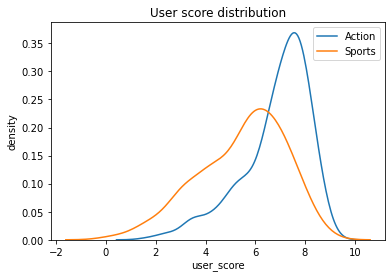

In [99]:
sns.kdeplot(df_us_score_action, label = 'Action')
sns.kdeplot(df_us_score_sports, label = 'Sports')
plt.ylabel('density')
plt.title('User score distribution')
plt.legend()
plt.show()

In [100]:
df_us_score_action.describe().to_frame()

,user_score
count,524.000000
mean,6.828244
std,1.375073
min,1.600000
25%,6.275000
50%,7.150000
75%,7.800000
max,9.100000


In [101]:
df_us_score_sports.describe().to_frame()

,user_score
count,195.000000
mean,5.455897
std,1.738646
min,0.200000
25%,4.300000
50%,5.700000
75%,6.800000
max,8.800000


Распределения оценок для двух жанров отличаются. Жанр Action имеет мощный узкий пик около оценки 8, пик жанра Sports находится на отметке 6 и он заметно шире. Среднее и медиана оценок жанра Action выше, а стандартное отклонение ниже. С первого взгляда может показаться, что средние оценки отличаются, однако, имея дело с выборками, куда надежнее будет провести статистический тест. Предварительно нужно проверить, отличаются ли дисперсии генеральных совокупностей, из которых взяты выборки. Для этого применим статистический тест Левене.

**Тест Левене**

**Нулевая гипотеза**: дисперсии не отличаются.

**Альтернативная гипотеза**: дисперсии отличаются.

**Уровень статистической значимости**: 0.05.

In [102]:
stat, p = st.levene(df_us_score_action, df_us_score_sports)
p

1.6619051463586425e-05

Р-значение существенно меньше уровня статистической значимости. Есть все основания отвергнуть нулевую гипотезу и считать дисперсии различными.

**Т-тест**

**Нулевая гипотеза**: средние пользовательские рейтинги жанров Action и Sports одинаковы.

**Альтернативная гипотеза**: средние пользовательские рейтинги разные.

**Уровень статистической значимости**: 0.05, что означает, если вероятность взять данную выборку из генеральной совокупности, при которой средние рейтинги пользователей одинаковы, ниже 5%, то мы можем отвергнуть нулевую гипотезу и считать средние рейтинги пользователей разными.

In [64]:
results = st.ttest_ind(df_us_score_action, df_us_score_sports, equal_var=False)

print('p-значение:', results.pvalue)

p-значение: 3.551295319559386e-20


Р-значение существенно ниже заданного уровня статистической значимости. Отвергаем нулевую гипотезу. Делаем вывод, что средние пользовательские рейтинги жанров Action и Sports разные.

### Вывод

1. Гипотеза 1 верная: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Гипотеза 2 верная: средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

1. Были проанализированы данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах с 1980 по 2016 год. В результате исследовательского анализа данных были получены следующие выводы:
    1. Количество выпускаемых игр росло с 1980 года, достигло пика в 2007-2008 годах, а затем упало в более чем 2 раза. В последние 5 лет выпускается около 500-600 игр в год.
    2. Характерный срок появления новых и исчезновения старых платформ - 10 лет.
    3. Для того, чтобы построить прогноз на 2017 год, был выбран актуальный период, который составил 5 лет. Дальнейшие выводы были получены по данным 2012-2016 годов.
    4. Потенциально прибыльными платформами являются PS4 и Xbox one. 
    5. Для всех платформ медианное значение продаж игры не превышает 500 тысяч копий. Однако на всех платформах есть крайне успешные проекты, которые продаются милионными тиражами. Анализируя медианные значения, было заключено, что "типичная" игра на Xbox 360 продается лучше остальных платформ. Следом идут PS3, PS4, Xbox one, WiiU.
    6. Оценки критиков имеют слабое влияние на продажи, оценки же пользователей вообще никак не влияют на продажи.
    7. Наибольшее количество игр было выпущено в жанре Action, в этом же жанре наивысшее суммарное количество продаж. Однако, наиболее прибыльным жанром является Shooter, т.к. в среднем игра данного жанра продается тиражом более 1.2 млн копий, этот же покатазатель для жанра Action лишь слегка превышает 0.4 млн копий. Наименее прибыльным является жанр Adventure со средним тиражом продаж на одну игру менее 100 тысяч копий.
2. Был составлен портрет пользователя каждого региона (Северная Америка, Европа, Япония):
    1. Пользователи в Северной Америке и Европе похожи друг на друга, но пользователи в Японии сильно отличаются.
    2. В Европе и Северной Америке самые популярные платформы - Xbox и Playstation, причем в Европе немного популярнее Playstation, а в Америке Xbox. В Японии лидером является платформа 3DS, но и на Playstation люди играют, чего нельзя сказать про Xbox, обе консоли которого являются аутсайдерами в Японии на равне с PC.
    3. В Северной Америке и Европе чаще всего играют в жанры Action или Shooter, в Японии - Role-playing и Shooter. 
    4. Рейтинг игры оказывает разное влияние на продаваемость игр в разных регионах. В Северной Америке и Европе лучше всего продаются игры для взрослых (17+), в Японии же игры с неизвестным (или неуказанным) рейтингом.
3. Две статистические гипотезы были проверены с помощью Т-теста, были получены следующие выводы:
    1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    2. Средние пользовательские рейтинги жанров Action и Sports разные.